In [204]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
# Read csv 
csv_file_path = 'Resources/Unemployment rate (%).csv'
unemployment_df = pd.read_csv(csv_file_path)
unemployment_df

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15+",2021,5.58,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
1,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15-24",2021,8.71,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
2,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 25+",2021,4.41,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
3,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15+",2021,5.60,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
4,Afghanistan,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45,NaN,NaN,Unemployment definition: Two criteria (not in ...,Repository: ILO-STATISTICS - Micro data proces...
...,...,...,...,...,...,...,...,...,...,...,...
11391,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15-24",2014,5.93,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
11392,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 25+",2014,3.65,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
11393,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Female,"Age (Youth, adults): 15+",2014,5.18,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
11394,Zimbabwe,SDG indicator 8.5.2 - Unemployment rate (%),LFS - Labour Force Survey,Sex: Female,"Age (Youth, adults): 15-24",2014,7.81,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...


In [206]:
# Drop unnecessary columns 
columns_to_drop = ['indicator.label','source.label', 'obs_status.label','note_classif.label','note_indicator.label','note_source.label' ]
unemployment_df = unemployment_df.drop(columns=columns_to_drop)
unemployment_df.head()

,ref_area.label,sex.label,classif1.label,time,obs_value
0,Afghanistan,Sex: Total,"Age (Youth, adults): 15+",2021,5.58
1,Afghanistan,Sex: Total,"Age (Youth, adults): 15-24",2021,8.71
2,Afghanistan,Sex: Total,"Age (Youth, adults): 25+",2021,4.41
3,Afghanistan,Sex: Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45


In [207]:
# Rename columns 
new_column_names = {'ref_area.label': 'country', 'sex.label': 'gender', 'classif1.label':'age_group', 'time':'year','obs_value':'unemployment_rate'}
unemployment_df.rename(columns=new_column_names, inplace=True)
unemployment_df.head()



,country,gender,age_group,year,unemployment_rate
0,Afghanistan,Sex: Total,"Age (Youth, adults): 15+",2021,5.58
1,Afghanistan,Sex: Total,"Age (Youth, adults): 15-24",2021,8.71
2,Afghanistan,Sex: Total,"Age (Youth, adults): 25+",2021,4.41
3,Afghanistan,Sex: Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45


In [208]:
# Drop 'Sex:Total' from gender column, this project only compareing the unemployment rate by gender 
unemployment_df = unemployment_df[unemployment_df['gender'] != 'Sex: Total']
unemployment_df

,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Sex: Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Sex: Male,"Age (Youth, adults): 15-24",2021,8.45
5,Afghanistan,Sex: Male,"Age (Youth, adults): 25+",2021,4.60
6,Afghanistan,Sex: Female,"Age (Youth, adults): 15+",2021,5.50
7,Afghanistan,Sex: Female,"Age (Youth, adults): 15-24",2021,9.41
...,...,...,...,...,...
11391,Zimbabwe,Sex: Male,"Age (Youth, adults): 15-24",2014,5.93
11392,Zimbabwe,Sex: Male,"Age (Youth, adults): 25+",2014,3.65
11393,Zimbabwe,Sex: Female,"Age (Youth, adults): 15+",2014,5.18
11394,Zimbabwe,Sex: Female,"Age (Youth, adults): 15-24",2014,7.81


In [209]:
# Simplify 'gender' column : keep the format as 'male', 'female'
unemployment_df['gender'] = unemployment_df['gender'].str.replace('Sex: ', '')
unemployment_df.head()

,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Male,"Age (Youth, adults): 15-24",2021,8.45
5,Afghanistan,Male,"Age (Youth, adults): 25+",2021,4.60
6,Afghanistan,Female,"Age (Youth, adults): 15+",2021,5.50
7,Afghanistan,Female,"Age (Youth, adults): 15-24",2021,9.41


In [210]:
# Drop 'Sex:Other' from gender column
unemployment_df = unemployment_df[unemployment_df['gender'] != 'Other']
unemployment_df

,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Male,"Age (Youth, adults): 15+",2021,5.60
4,Afghanistan,Male,"Age (Youth, adults): 15-24",2021,8.45
5,Afghanistan,Male,"Age (Youth, adults): 25+",2021,4.60
6,Afghanistan,Female,"Age (Youth, adults): 15+",2021,5.50
7,Afghanistan,Female,"Age (Youth, adults): 15-24",2021,9.41
...,...,...,...,...,...
11391,Zimbabwe,Male,"Age (Youth, adults): 15-24",2014,5.93
11392,Zimbabwe,Male,"Age (Youth, adults): 25+",2014,3.65
11393,Zimbabwe,Female,"Age (Youth, adults): 15+",2014,5.18
11394,Zimbabwe,Female,"Age (Youth, adults): 15-24",2014,7.81


In [211]:
# Simplify 'age_group' column : extract the number 
unemployment_df['age_group'] = unemployment_df['age_group'].str.extract(r'(\d{2}\+|\d{2}-\d{2})')
unemployment_df.head()

d:\1\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,gender,age_group,year,unemployment_rate
3,Afghanistan,Male,15+,2021,5.60
4,Afghanistan,Male,15-24,2021,8.45
5,Afghanistan,Male,25+,2021,4.60
6,Afghanistan,Female,15+,2021,5.50
7,Afghanistan,Female,15-24,2021,9.41


In [212]:
# Remove non-country data 
non_countries = ['World', 'World: Low income', 'World: Lower-middle income', 'World: Upper-middle income', 'World: High income', 'Africa', 'Arab States', 'Asia and the Pacific', 'Europe and Central Asia', 'Americas', 
                 'Netherlands Antilles', 'Hong Kong, China', 'Macau, China', 'Curaçao', 'Cayman Islands', 'Falkland Islands (Malvinas)', 'Cook Islands', 'Niue', 'Taiwan, China', 'Occupied Palestinian Territory']
unemployment_df = unemployment_df[~unemployment_df['country'].isin(non_countries)]



In [213]:
# Get the unique country 
unique_country = unemployment_df['country'].unique()
unique_country
len(unique_country)

184

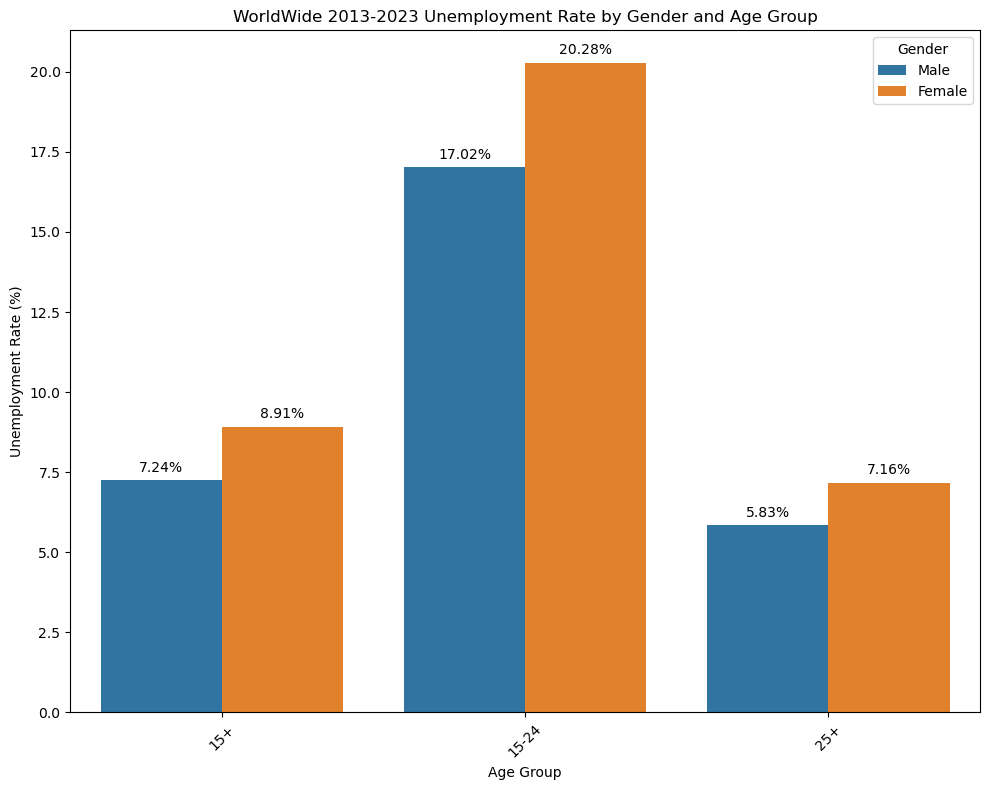

In [214]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='age_group', y='unemployment_rate', hue='gender', data=unemployment_df, ci=None)

# Adding the text annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
    
plt.title('WorldWide 2013-2023 Unemployment Rate by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

In [215]:
unemployment_df.to_csv('unemployment_cleaned.csv', index=False)


# Clustering Similar Countries

d:\1\envs\PythonData\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



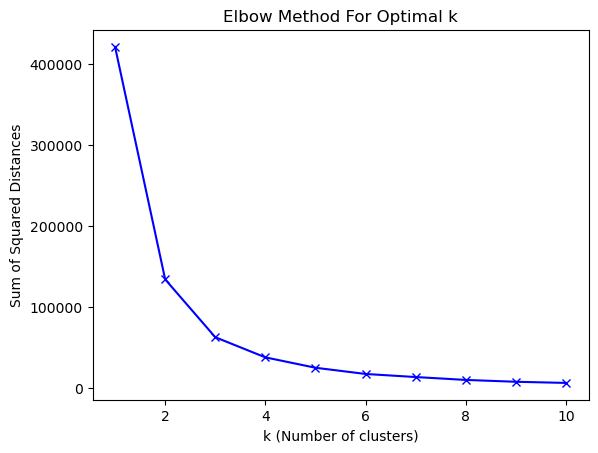

In [228]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# filter the DF for only female data 
female_unemployment_df = unemployment_df[unemployment_df['gender'] == 'Female']

# Removing NaN values for safety
female_unemployment_df.dropna(subset=['unemployment_rate'], inplace=True)

# Determining the range of k values to test
k_range = range(1, 11)  # Testing for 1 to 10 clusters

# Calculating sum of squared distances for each k
sum_of_squared_distances = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(female_unemployment_df[['unemployment_rate']])
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(k_range, sum_of_squared_distances, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [217]:
from sklearn.cluster import KMeans
import seaborn as sns

In [218]:
# Preparing data for clustering

# Handle missing values
cluster_data = female_unemployment_df.groupby(['country'])['unemployment_rate'].mean().reset_index()
cluster_data.dropna(inplace=True)  # Remove rows with NaN values
# Ensure there are no infinite values
cluster_data = cluster_data[np.isfinite(cluster_data['unemployment_rate'])]

In [219]:
# K-means clustering
kmeans = KMeans(n_clusters=4)  
cluster_data['cluster'] = kmeans.fit_predict(cluster_data[['unemployment_rate']])

In [220]:
import plotly.express as px

fig = px.scatter(cluster_data, x='country', y='unemployment_rate',
                 color='cluster', hover_name='country',
                 title="Clusters of Countries by Female Unemployment Rate")

fig.update_layout(width=1000, height=600)
fig.update_traces(marker=dict(size=10))
fig.update_layout(xaxis_tickangle=-45)
fig.update_layout(showlegend=True)

fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.99,
    xanchor="left",
    x=0.99
))

# Show the updated plot
fig.show()




In [221]:
cluster_groups = cluster_data.groupby('cluster')['country'].apply(list)
cluster_groups

cluster
0    [Albania, Angola, Argentina, Armenia, Bahamas,...
1    [Australia, Austria, Belarus, Benin, Bolivia, ...
2    [Algeria, Bosnia and Herzegovina, Botswana, Ca...
3    [Afghanistan, Azerbaijan, Bangladesh, Belgium,...
Name: country, dtype: object

In [222]:
len(cluster_groups[0])

35

In [223]:
len(cluster_groups[1])

74

In [224]:
len(cluster_groups[2])

26

In [225]:
len(cluster_groups[3])

48

In [226]:
print(f"Cluster_0 includes: {cluster_groups[0]}")
print(f"Cluster_1 includes: {cluster_groups[1]}")
print(f"Cluster_2 includes: {cluster_groups[2]}")
print(f"Cluster_3 includes: {cluster_groups[3]}")


Cluster_0 includes: ['Albania', 'Angola', 'Argentina', 'Armenia', 'Bahamas', 'Barbados', 'Belize', 'Brazil', 'Brunei Darussalam', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Georgia', 'Grenada', 'Guyana', 'Italy', 'Jamaica', 'Lebanon', 'Martinique', 'Mauritania', 'Mauritius', 'Micronesia, Federated States of', 'Monaco', 'Montenegro', 'Morocco', 'Nauru', 'New Caledonia', 'Portugal', 'Samoa', 'San Marino', 'Serbia', 'Suriname', 'Türkiye', 'Uruguay']
Cluster_1 includes: ['Australia', 'Austria', 'Belarus', 'Benin', 'Bolivia', 'Burundi', 'Cambodia', 'Cameroon', 'Chad', 'Congo, Democratic Republic of the', 'Cuba', 'Czechia', "Côte d'Ivoire", 'Denmark', 'Ecuador', 'El Salvador', 'Ethiopia', 'Faeroe Islands', 'Gambia', 'Germany', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Iceland', 'Indonesia', 'Isle of Man', 'Israel', 'Japan', 'Kazakhstan', 'Kenya', 'Korea, Republic of', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Liberia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Ma

# Predictive Modeling for Future Female Unemployment Rates

Mean Squared Error: 1.3785163583333409


d:\1\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

d:\1\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



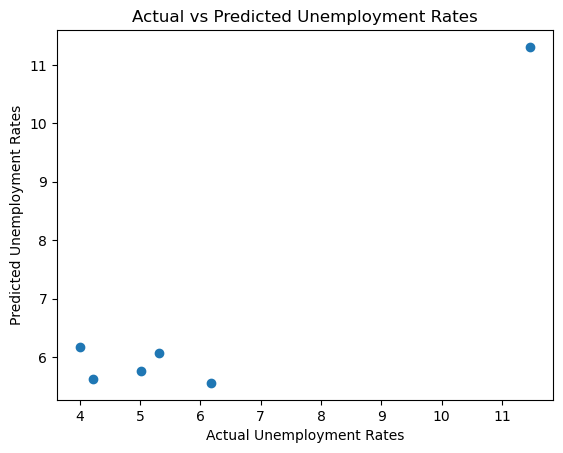

d:\1\envs\PythonData\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Predicted unemployment rate for the next year: 4.4481999999999955


In [233]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Convert 'year' to integer if it's not already
unemployment_df['year'] = unemployment_df['year'].astype(int)

# Filter the dataset for Australia and female
aus_female_data = unemployment_df[(unemployment_df['country'] == 'Australia')& (unemployment_df['gender'] == 'Female')]

# Create lag features
for lag in range(1, 4):
    aus_female_data[f'unemployment_rate_lag_{lag}'] = aus_female_data['unemployment_rate'].shift(lag)

# Drop the rows with NaN values that were created by lagging features
aus_female_data = aus_female_data.dropna()

# Define features and target variable
X = aus_female_data[[f'unemployment_rate_lag_{lag}' for lag in range(1, 4)]]  # Using only lag features as predictors
y = aus_female_data['unemployment_rate']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Unemployment Rates')
plt.ylabel('Predicted Unemployment Rates')
plt.title('Actual vs Predicted Unemployment Rates')
plt.show()

# If you need to predict for future years, you'll need future lag values, which might be available or forecasted by other means.
# Here's a hypothetical example where we just use the last three observed values to predict the next one (in practice, you'd want more robust future estimates)

# Let's assume that 'X_last' are the lag features from the last available year in the dataset
X_last = X.iloc[-1].values.reshape(1, -1)

# Predict the unemployment rate for the next year
next_year_prediction = rf.predict(X_last)
print(f'Predicted unemployment rate for the next year: {next_year_prediction[0]}')


# Data Model Optimisation

Epoch 1/100
17/17 - 1s - loss: 0.2056 - 1s/epoch - 74ms/step
Epoch 2/100
17/17 - 0s - loss: 0.1300 - 22ms/epoch - 1ms/step
Epoch 3/100
17/17 - 0s - loss: 0.0975 - 27ms/epoch - 2ms/step
Epoch 4/100
17/17 - 0s - loss: 0.0925 - 40ms/epoch - 2ms/step
Epoch 5/100
17/17 - 0s - loss: 0.0892 - 34ms/epoch - 2ms/step
Epoch 6/100
17/17 - 0s - loss: 0.0881 - 30ms/epoch - 2ms/step
Epoch 7/100
17/17 - 0s - loss: 0.0879 - 31ms/epoch - 2ms/step
Epoch 8/100
17/17 - 0s - loss: 0.0833 - 28ms/epoch - 2ms/step
Epoch 9/100
17/17 - 0s - loss: 0.0880 - 27ms/epoch - 2ms/step
Epoch 10/100
17/17 - 0s - loss: 0.0805 - 29ms/epoch - 2ms/step
Epoch 11/100
17/17 - 0s - loss: 0.0876 - 33ms/epoch - 2ms/step
Epoch 12/100
17/17 - 0s - loss: 0.0818 - 60ms/epoch - 4ms/step
Epoch 13/100
17/17 - 0s - loss: 0.0762 - 26ms/epoch - 2ms/step
Epoch 14/100
17/17 - 0s - loss: 0.0769 - 27ms/epoch - 2ms/step
Epoch 15/100
17/17 - 0s - loss: 0.0718 - 25ms/epoch - 1ms/step
Epoch 16/100
17/17 - 0s - loss: 0.0694 - 23ms/epoch - 1ms/step
Ep

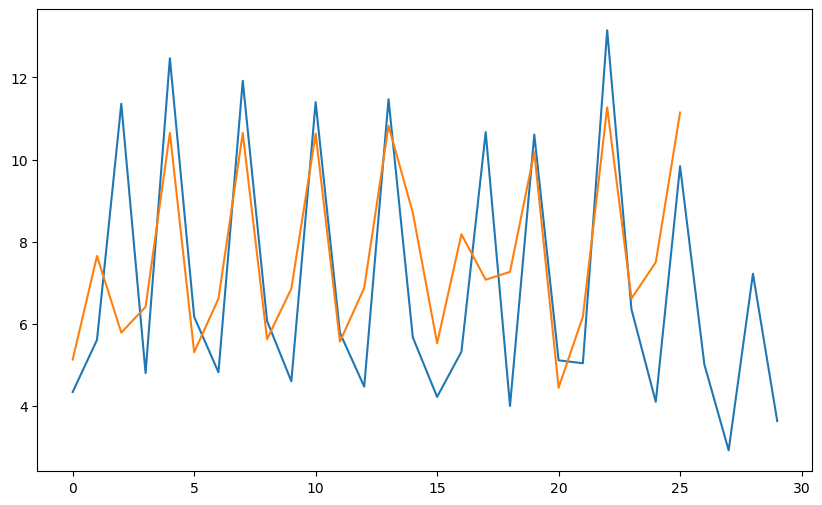

In [234]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
# Filter for females in Australia and select relevant columns
aus_female_data = unemployment_df[(unemployment_df['country'] == 'Australia') & (unemployment_df['gender'] == 'Female')]
aus_female_data = aus_female_data[['year', 'unemployment_rate']].sort_values('year')
aus_female_data.set_index('year', inplace=True)

# Scale the unemployment_rate
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(aus_female_data)

# Convert scaled data to supervised learning format
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
trainX, testX = X[0:train_size,:,:], X[train_size:len(X),:,:]
trainY, testY = Y[0:train_size], Y[train_size:len(Y)]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(np.concatenate((trainPredict, testPredict)))
plt.show()
